In [10]:
from matplotlib import pyplot as plt
from matplotlib import rcParams
import numpy as np
from pathlib import Path
import pandas as pd
import seaborn as sns
import warnings

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score

In [2]:
rcParams['figure.figsize'] = (10, 5)
plt.style.use('fivethirtyeight')
pd.set_option('max_columns', 100)
pd.set_option("display.precision", 4)
warnings.simplefilter('ignore')

## Load dataset

In [3]:
data_dir = Path('C:\DACON\/titanic\dataset')
build_dir = Path('C:\DACON\/titanic\/build')
feature_dir = Path('C:\DACON\/titanic\/build\/feature')

class_file = feature_dir / 'class.csv'
one_hot_file = feature_dir / 'one_hot.csv'
sample_file = data_dir / 'submission.csv'

seed = 23

In [31]:
## Change THESE
algo_name = 'rf'   
feature_name = 'class'
model_name = f'{algo_name}_{feature_name}'

sub_file = build_dir / f'{model_name}.csv'
print(sub_file)

C:\DACON\titanic\build\rf_class.csv


df = train 891 rows + test 418 rows(with no 'Survived' value)

In [5]:
class_df = pd.read_csv(class_file, index_col=0)
one_hot_df = pd.read_csv(one_hot_file, index_col=0)

print(class_df.shape, one_hot_df.shape)

ntrn = 891
ntst = 418
target_col = 'Survived'

class_df.head()

(1309, 8) (1309, 30)


,Survived,Pclass,Sex,Age,Fare,Embarked,Title,Family
PassengerId,,,,,,,,
1,0.0,3,0,2,1,0,1,1
2,1.0,1,1,3,3,2,3,1
3,1.0,3,1,2,1,0,2,0
4,1.0,1,1,3,3,0,3,1
5,0.0,3,0,3,1,0,1,0


## Split dataset

In [7]:
# Change THESE!
df = class_df # one_hot_df
# sub_file = class_sub_file # one_hot_sub_file 

y = df[target_col][:ntrn]
df.drop(target_col, axis=1, inplace=True)
features = df.columns.to_list()

trn = df[features][:ntrn]
tst = df[features][ntrn:]
print(y.shape, df.shape)

(891,) (1309, 7)


In [8]:
X_trn, X_val, y_trn, y_val = train_test_split(trn, y, test_size=.2, random_state=seed)
print(X_trn.shape, X_val.shape, y_trn.shape, y_val.shape)

(712, 7) (179, 7) (712,) (179,)


## Predict

### Logistic Regression

In [11]:
from sklearn.linear_model import LogisticRegression

algo_name = 'logreg'
feature_name = 'class'
model_name = f'{algo_name}_{feature_name}'

sub_file = build_dir / f'{model_name}.csv'
print(sub_file)

C:\DACON\titanic\build\logreg_class.csv


In [18]:
logreg = LogisticRegression()
logreg.fit(X_trn, y_trn)
        # eval_set=[(X_val, y_val)],
        # eval_metric = 'accuracy_score', 
        # early_stopping_rounds=10)
y_pred = logreg.predict(X_val)
y_tst = logreg.predict(tst)

print(classification_report(y_val, y_pred, target_names=['Survived 0', 'Survived 1']))

              precision    recall  f1-score   support

  Survived 0       0.83      0.84      0.84       115
  Survived 1       0.71      0.69      0.70        64

    accuracy                           0.79       179
   macro avg       0.77      0.77      0.77       179
weighted avg       0.79      0.79      0.79       179



<AxesSubplot:ylabel='feature'>

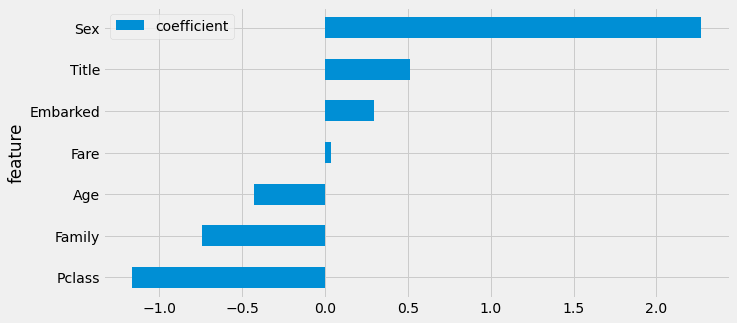

In [19]:
coeff = pd.DataFrame({'feature': trn.columns, 'coefficient': logreg.coef_[0]})
coeff = coeff.sort_values('coefficient').set_index('feature')
coeff.plot(kind='barh')

### Support Vector Machine (SVM)

In [21]:
from sklearn.svm import SVC, LinearSVC

svc = SVC()
svc.fit(X_trn, y_trn)
y_pred = svc.predict(X_val)
y_tst = svc.predict(tst)

print(classification_report(y_val, y_pred, target_names=['Survived 0', 'Survived 1']))

              precision    recall  f1-score   support

  Survived 0       0.83      0.89      0.86       115
  Survived 1       0.77      0.67      0.72        64

    accuracy                           0.81       179
   macro avg       0.80      0.78      0.79       179
weighted avg       0.81      0.81      0.81       179



### K-Nearest Neighbors(K-NN)

In [26]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(X_trn, y_trn)
y_pred = knn.predict(X_val)
y_tst = knn.predict(tst)

print(classification_report(y_val, y_pred, target_names=['Survived 0', 'Survived 1']))

              precision    recall  f1-score   support

  Survived 0       0.83      0.86      0.85       115
  Survived 1       0.73      0.69      0.71        64

    accuracy                           0.80       179
   macro avg       0.78      0.77      0.78       179
weighted avg       0.80      0.80      0.80       179



### Decision Tree

In [27]:
from sklearn.tree import DecisionTreeClassifier

decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_trn, y_trn)
y_pred = decision_tree.predict(X_val)
y_tst = decision_tree.predict(tst)

print(classification_report(y_val, y_pred, target_names=['Survived 0', 'Survived 1']))

              precision    recall  f1-score   support

  Survived 0       0.81      0.90      0.85       115
  Survived 1       0.77      0.62      0.69        64

    accuracy                           0.80       179
   macro avg       0.79      0.76      0.77       179
weighted avg       0.80      0.80      0.79       179



### Random Forest
- Highest accuracy with the validation dataset

In [29]:
from sklearn.ensemble import RandomForestClassifier

random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_trn, y_trn)
y_pred = random_forest.predict(X_val)
y_tst = random_forest.predict(tst)

print(classification_report(y_val, y_pred, target_names=['Survived 0', 'Survived 1']))

              precision    recall  f1-score   support

  Survived 0       0.83      0.88      0.86       115
  Survived 1       0.76      0.69      0.72        64

    accuracy                           0.81       179
   macro avg       0.80      0.78      0.79       179
weighted avg       0.81      0.81      0.81       179



## Save as .csv

In [30]:
sub = pd.read_csv(sample_file, index_col=0)
print(sub.shape)
sub.head()

(418, 1)


,Survived
PassengerId,
892,0
893,1
894,0
895,0
896,1


In [32]:
sub[target_col] = y_tst
sub.to_csv(sub_file)